<font size="+3"><strong>Bankruptcy in Poland</strong></font>

**The Polish companies bankruptcy data set** contains financial ratios for Polish companies. The data was collected from bankruptcy filings and is divided into two classes: companies that filed for bankruptcy and those that did not. The data set includes 43405 instances and 64 features, all of which are numerical. The aim is to predict bankruptcy, i.e., to determine whether a company will file for bankruptcy based on its financial ratios.

The aim of the study is to develop a predictive model that can detect companies that are at risk of going bankrupt. To achieve this objective, the focus should be on maximizing the recall of the model. The rationale behind this is that the cost of failing to identify a bankrupt company is significantly higher than the cost of sending information to a non-bankrupt company. Therefore, the model should be designed to cast a wide net and identify as many potentially bankrupt companies as possible, even if that means some non-bankrupt companies are incorrectly identified.

In [1]:
# Import necessary librairies

from pathlib import Path
import pandas as pd
#from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import VimeoVideo
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Exploratory Data Analysis

In [4]:


# fetch dataset
polish_companies_bankruptcy = fetch_ucirepo(id=365)

# data (as pandas dataframes)
X = polish_companies_bankruptcy.data.features
y = polish_companies_bankruptcy.data.targets

df = pd.concat([X, y], axis=1)
df.rename(columns={df.columns[-1]: 'bankrupt'}, inplace=True)

df.head()


,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64,bankrupt
0,1,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,1.2479,0.21402,0.119980,0.47706,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,0.25792,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,1.4293,0.24806,0.123040,NaN,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,0.33472,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,1,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,1.4283,0.30260,0.189960,NaN,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,1,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.11550,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,1,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,NaN,0.19832,0.115530,0.18732,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [ ]:
from pathlib import Path
import pandas as pd
from ydata_profiling import ProfileReport  # ydata-profiling instead of pandas-profiling

# Define the path to the dataset
BANKRUPTCY_DATA_PATH = Path("data.csv")

def load_dataset(file_path: Path) -> pd.DataFrame:
    # Load the CSV dataset with pandas
    df = pd.read_csv(file_path, sep= "\t", index_col=0)
    df = df.set_index("company_id")
    return df


# Define the output path for the profile report
PROFILE_REPORT_PATH = Path("profile_report.html")

def generate_profile_report(df: pd.DataFrame, path: Path = PROFILE_REPORT_PATH) -> None:
    # Generate a profile report using ydata-profiling and output it to an HTML file.
    profile = ProfileReport(df, title="Bankruptcy in Poland Dataset Profiling Report", explorative=True)
    profile.to_file(output_file=path)

# Load the dataset
df = load_dataset(BANKRUPTCY_DATA_PATH)

# Generate and save the profiling report
#generate_profile_report(bankruptcy_df)



In [5]:
df.shape

(43405, 66)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      43405 non-null  int64  
 1   A1        43397 non-null  float64
 2   A2        43397 non-null  float64
 3   A3        43397 non-null  float64
 4   A4        43271 non-null  float64
 5   A5        43316 non-null  float64
 6   A6        43397 non-null  float64
 7   A7        43397 non-null  float64
 8   A8        43311 non-null  float64
 9   A9        43396 non-null  float64
 10  A10       43397 non-null  float64
 11  A11       43361 non-null  float64
 12  A12       43271 non-null  float64
 13  A13       43278 non-null  float64
 14  A14       43397 non-null  float64
 15  A15       43369 non-null  float64
 16  A16       43310 non-null  float64
 17  A17       43311 non-null  float64
 18  A18       43397 non-null  float64
 19  A19       43277 non-null  float64
 20  A20       43278 non-null  fl

In [7]:
df.describe()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64,bankrupt
count,43405.000000,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,43361.000000,43271.000000,43278.000000,43397.000000,4.336900e+04,43310.000000,43311.000000,43397.000000,43277.000000,4.327800e+04,37551.000000,43397.000000,43278.000000,42483.000000,43397.000000,43310.000000,4.064100e+04,42593.000000,43397.000000,43278.000000,43278.000000,4.303700e+04,43271.000000,43311.000000,43397.000000,43397.000000,24421.000000,43397.000000,43278.000000,43271.000000,42651.000000,43278.000000,4.327800e+04,4.327800e+04,41258.000000,43270.000000,4.310800e+04,43396.000000,43278.000000,43311.000000,43397.000000,43104.000000,42593.000000,42593.000000,4.340400e+04,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,2.939753,0.035160,0.590212,0.114431,6.314702,-3.853480e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,0.131075,1.132430,0.809544,0.093489,1.991390e+03,1.411167,13.802535,0.098565,0.156277,2.430209e+02,3.884997,0.113923,0.138582,0.270012,0.392844,1.263864,1.107970e+03,6.003208,4.005020,7.370821,0.176847,1.163286e+03,8.636016,5.411439,0.111908,2.911241,105.075944,0.724357,-0.289102,2.147411,7.723198,-0.142514,1.074071e+03,8.310348e+02,14.822592,5.428857,3.577488e+02,0.028584,-0.482584,5.835373,0.483521,6.478459,23.772623,24.654700,7.672346e+03,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.481067e+02,17.033202,1.502521e+03,9.343074,72.796105,0.048174
std,1.283975,2.994109,5.842748,5.439429,295.434425,6.122797e+04,7.201326,5.713075,505.894281,62.932732,14.670597,5.306782,67.590296,86.944053,5.713075,9.634599e+04,68.519998,507.322101,5.737645,48.692154,3.754517e+04,228.668931,5.155778,48.334974,7.988151,12.891440,66.224124,3.501480e+04,153.468628,0.826857,814.490078,48.748410,9.573718e+04,118.991185,120.975110,4.783398,62.984347,3058.035496,14.749270,39.256360,56.029879,1399.950766,15.990988,1.472182e+05,1.100502e+05,2428.124571,295.356200,3.312802e+04,5.097322,45.152174,307.382687,5.438357,639.887467,1213.797976,1220.884065,7.005349e+04,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234518e+04,553.049406,1.393023e+05,124.177354,2369.744596,0.214137
min,1.000000,-463.890000,-430.870000,-479.960000,-0.403110,-1.190000e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,-463.890000,-6331.800000,-1460.600000,-517.480000,-9.632400e+06,-6331.800000,-0.412920,-517.480000,-1578.700000,-2.934000e+01,-1325.000000,-431.590000,-1578.700000,-463.890000,-500.930000,-6331.800000,-2.590000e+05,-3829.900000,-0.886060,-6351.700000,-1495.600000,-9.295600e+03,-19.197000,-1696.000000,-431.590000,-0.000857,-525.520000,-479.910000,-7522.000000,-101.270000,-1234.400000,-1395.800000,-1.160000e+05,-1.160000e+05,-256230.000000,-101.260000,-9.611000e+01,-542.560000,-9001.000000,-0.045239,-0.186610,-25.467000,-3828.900000,-3828.900000,-1.810000e+06,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.340000e+06,-1.543200,-10677.000000,0.000000
25%,2.000000,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,0.015409,0.015072,0.023881,0.005783,2.225800e+02,0.073476,1.451650,0.005783,0.003870,1.541325e+01,0.908225,0.000000,0.002269,0.021336,0.150100,0.066743,4.504800e-02,0.038214,3.495100,0.082753,0.006961,4.639500e+01,2.819900,0.305725,0.006038,1.101100,1.142300,0.419830,0.004165,0.052696,0.026679,0.000000,6.660850e+01,3.487775e+01,0.019168,0.607455,1.622575e+01,-0.038183,-0.026674,0.774935,0.190060,0.126937,0.686780,0.956330,2.755425e+01,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,0.000000
50%,3.000000,0.049660

In [8]:
# Target identification
target = "bankrupt"

In [9]:
# Identification of missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
year            0
A1              8
A2              8
A3              8
A4            134
A5             89
A6              8
A7              8
A8             94
A9              9
A10             8
A11            44
A12           134
A13           127
A14             8
A15            36
A16            95
A17            94
A18             8
A19           128
A20           127
A21          5854
A22             8
A23           127
A24           922
A25             8
A26            95
A27          2764
A28           812
A29             8
A30           127
A31           127
A32           368
A33           134
A34            94
A35             8
A36             8
A37         18984
A38             8
A39           127
A40           134
A41           754
A42           127
A43           127
A44           127
A45          2147
A46           135
A47           297
A48             9
A49           127
A50            94
A51             8
A52           301
A53           812
A54        

In [10]:
# Identification of duplicated values
print("\nDuplicated values: " + str(df.duplicated().sum()))


Duplicated values: 401


In [11]:
df.drop_duplicates(inplace= True)
df.shape

(43004, 66)

This is valuable information. We have determined that all our features are numeric and there are missing values. Our initial focus will be to understand the distribution of firms that are bankrupt versus those that are not.

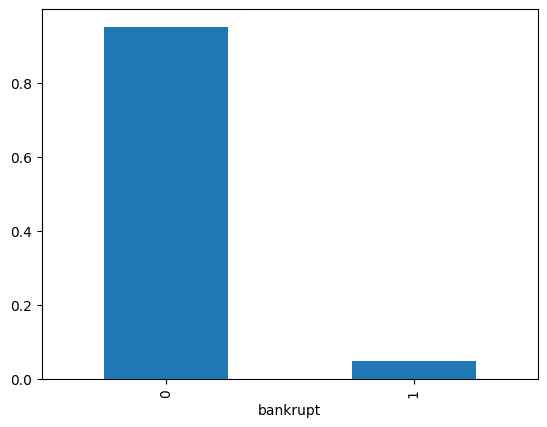

In [12]:
# Plot class balance
df["bankrupt"].value_counts(normalize=True).plot(kind="bar");

In [13]:
df.groupby('bankrupt').mean()

,year,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60,A61,A62,A63,A64
bankrupt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.927861,0.059173,0.545167,0.157009,6.455603,-367.692671,-0.000971,0.118812,12.305982,2.607520,0.654429,0.155307,1.375292,0.839795,0.118823,1877.957786,1.621859,13.472704,0.124208,0.166428,253.493652,4.019144,0.137063,0.148128,0.303029,0.412699,1.462841,1155.757899,6.214427,4.009409,7.383837,0.184315,916.872250,8.593744,5.432857,0.131581,2.835232,104.367803,0.752070,-0.116855,2.151252,8.201066,-0.151687,1126.041222,872.531859,15.192015,5.584482,374.379038,0.052196,-0.492903,5.997612,0.442080,6.788157,22.591612,23.466191,7949.730946,-27.618769,0.049641,31.781058,1.375155,467.678154,17.203337,1513.403296,9.392037,70.853976
1,3.186750,-0.320684,1.509695,-0.738087,4.156870,-748.790960,-1.170477,-0.312047,6.608257,1.933353,-0.368964,-0.254248,-3.719870,0.266554,-0.312047,4350.612266,-2.809188,7.677286,-0.312047,-0.108464,71.911546,1.356393,-0.231823,-0.111790,-0.269388,-0.665513,-2.740916,32.127860,3.127511,3.800801,8.245068,-0.032346,4009.044596,10.059575,5.647119,-0.272071,2.815207,64.200465,-0.268993,-3.771168,2.232401,-0.037072,-0.021786,220.902605,148.991119,4.379489,2.957276,82.676563,-0.332789,-0.396549,3.249616,1.327548,1.372974,50.013328,51.188038,791.762143,-3.726804,-1.182758,1.096018,0.607361,135.807293,15.360279,1435.287703,8.893931,108.887201


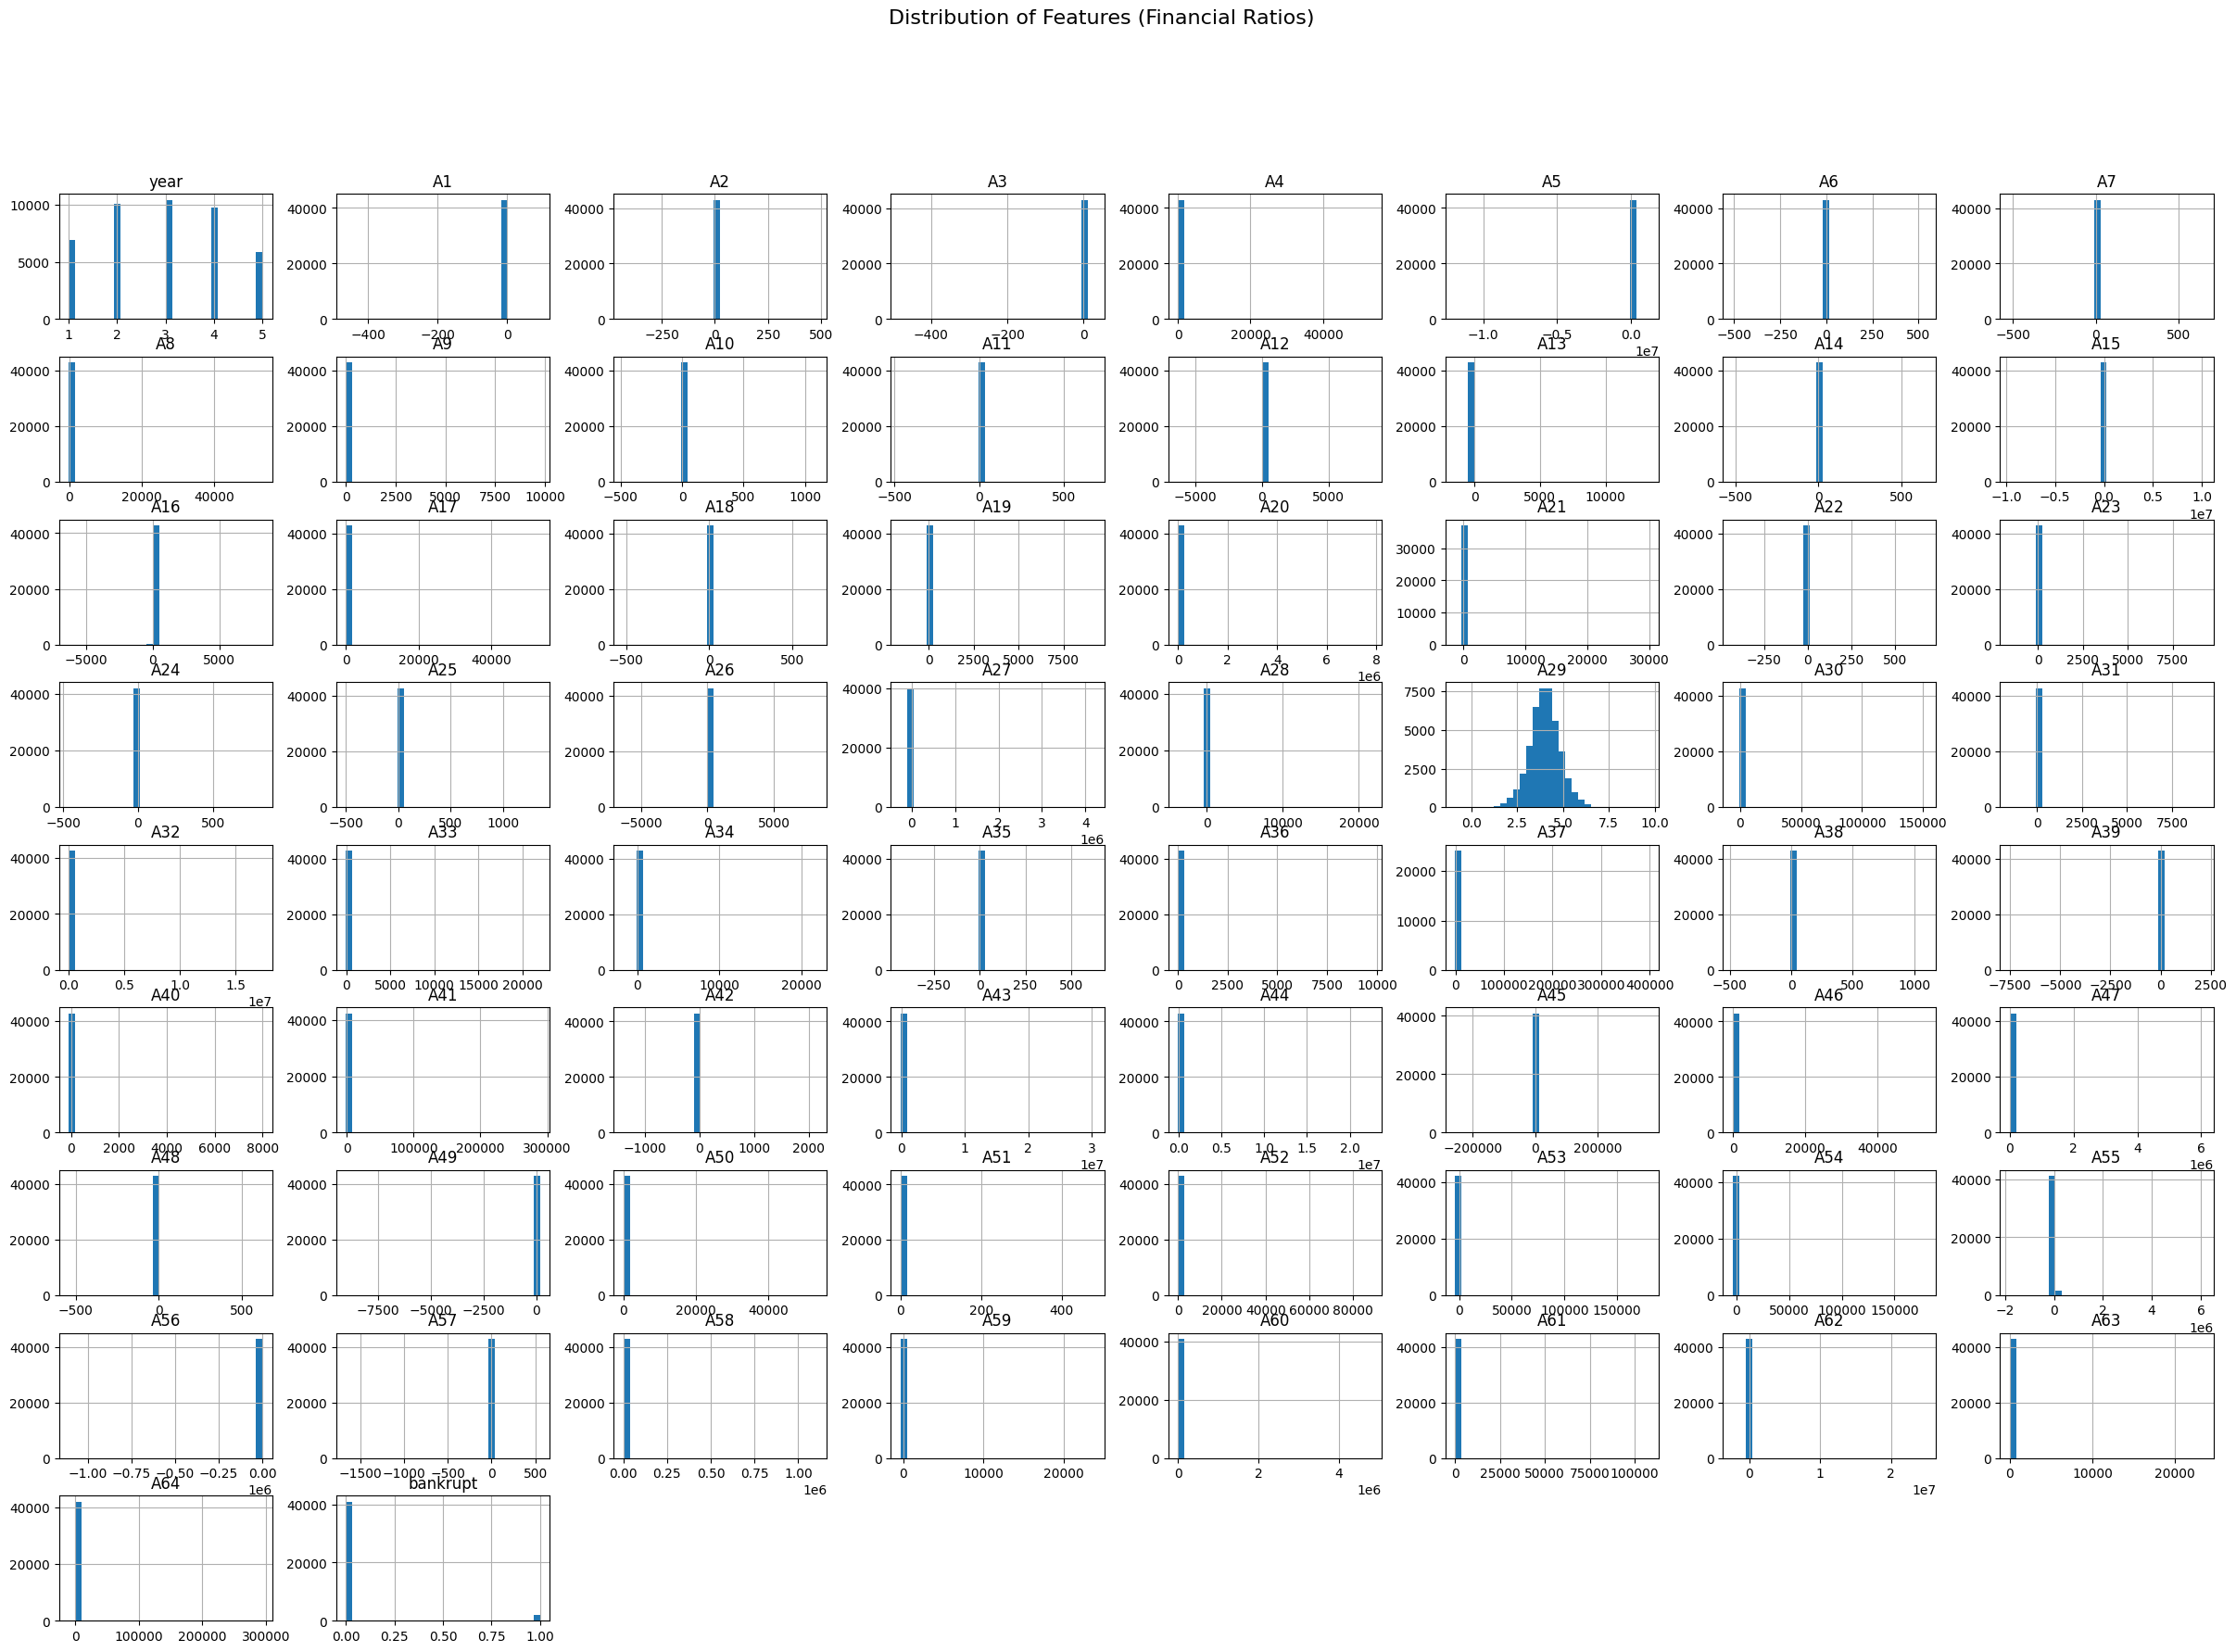

In [14]:
df.hist(bins=30, figsize=(30, 20))
plt.suptitle('Distribution of Features (Financial Ratios)', fontsize=16)
plt.show()

It's encouraging to see that the economy in Poland is generally stable based on the fact that most companies in our dataset are not bankrupt. However, this also indicates that our dataset is imbalanced, with a majority class much larger than the minority class. Moving forward, we need to keep this in mind. To gain further insight, let's examine the distribution of values for one of these features, "feat_27", by creating a boxplot.

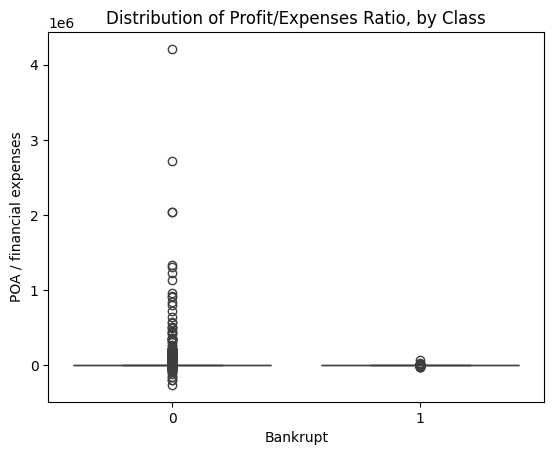

In [15]:
# Create boxplot
sns.boxplot(x='bankrupt', y="A27",data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

In [16]:
# Summary statistics for `feat_27`
df.A27.describe()

,A27
count,4.025400e+04
mean,1.117572e+03
std,3.518238e+04
min,-2.590000e+05
25%,4.480175e-02
50%,1.088400e+00
75%,5.179425e+00
max,4.210000e+06


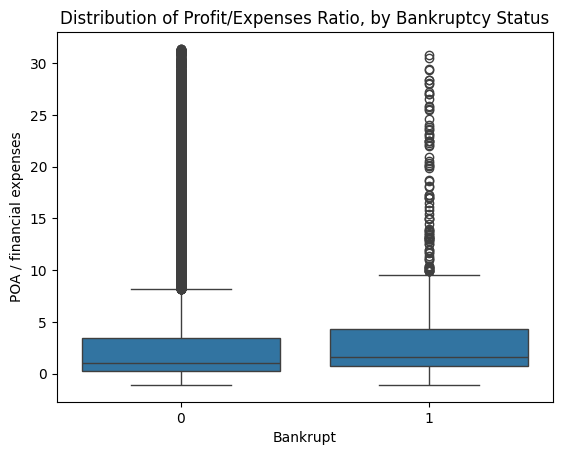

In [17]:
# Create clipped boxplot
min , max = df["A27"].quantile([0.1,0.9])
sns.boxplot(x="bankrupt", y="A27", data=df[df["A27"].between(min,max)])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

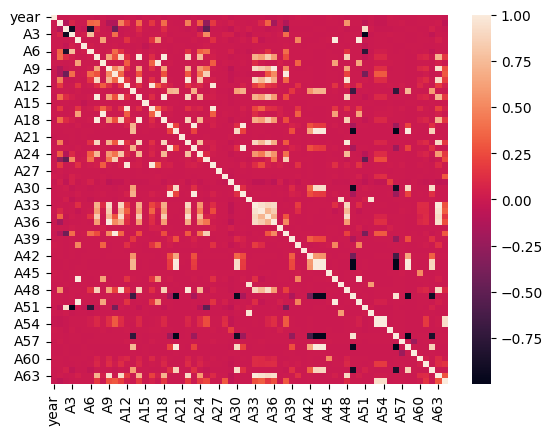

In [18]:
corr = df.drop(columns=["bankrupt"]).corr()
sns.heatmap(corr);

In this EDA (Exploratory Data Analysis), we found several key insights. Firstly, our dataset is imbalanced, which is an important consideration for our data preparation. Secondly, a significant number of our features have missing values that we need to fill in. Given that our features are highly skewed, median imputation is likely a better strategy than mean imputation. Lastly, we identified autocorrelation issues, indicating that linear models may not be the best fit for this dataset. We should consider using a tree-based model instead.

# Data Preprocessing

### Split

In [19]:
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (43004, 65)
y shape: (43004,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=61)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (34403, 65)
y_train shape: (34403,)
X_test shape: (8601, 65)
y_test shape: (8601,)


### Impute

In [21]:
# Create an instance of SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the data
imputer.fit(X_train)

# Transform the data and store it in a new dataframe df_imputed
X_imputed = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns)

### Feature Selection

In [25]:
import numpy as np# Step 1: Generate a single random feature
np.random.seed(22)
n_samples = X_imputed.shape[0]
random_feature = np.random.rand(n_samples)

# Create a DataFrame for the random feature
random_feature_df = pd.DataFrame(random_feature, columns=['random_feature'])

# Step 2: Combine the random feature with your dataset
X_combined = pd.concat([X_imputed.reset_index(drop=True), random_feature_df], axis=1)

# Step 3: Fit the Random Forest model and get feature importances
rfc = RandomForestClassifier()
rfc.fit(X_combined, y_train)

# Get feature importances
importances = rfc.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_combined.columns,
    'Importance': importances
})

importance_df.sort_values(by='Importance', ascending=False)


,Feature,Importance
27,A27,0.060625
34,A34,0.038122
46,A46,0.035503
58,A58,0.029027
24,A24,0.028532
56,A56,0.022702
35,A35,0.021502
9,A9,0.021259
29,A29,0.019121
39,A39,0.019110


In [26]:
# Step 4: Find the importance of the random feature
random_feature_importance = importance_df.loc[importance_df['Feature'] == 'random_feature', 'Importance'].values[0]

# Select features that have importance greater than the random feature's importance
selected_features = importance_df[importance_df['Importance'] > random_feature_importance]

selected_feature_list = selected_features['Feature'].tolist()
print("Selected Features Based on Importance Greater Than the Random Feature:")
print(selected_feature_list)

Selected Features Based on Importance Greater Than the Random Feature:
['A5', 'A6', 'A9', 'A22', 'A24', 'A27', 'A29', 'A34', 'A35', 'A39', 'A40', 'A41', 'A42', 'A44', 'A46', 'A55', 'A56', 'A58', 'A61']


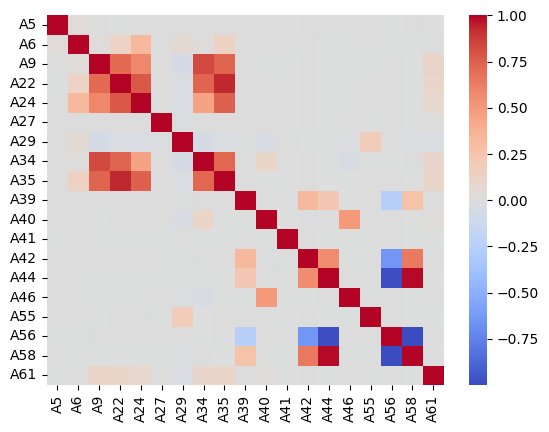

In [29]:
corr = df[['A5', 'A6', 'A9', 'A22', 'A24', 'A27', 'A29', 'A34', 'A35', 'A39', 'A40', 'A41', 'A42', 'A44', 'A46', 'A55', 'A56', 'A58', 'A61']].corr()
sns.heatmap(corr,cmap="coolwarm");

In [30]:
X_imputed = X_imputed[[ 'A6', 'A9', 'A24', 'A27', 'A29', 'A34', 'A35', 'A39', 'A40', 'A44', 'A46', 'A56', 'A58', 'A61']]
X_test = X_test[['A6', 'A9', 'A24', 'A27', 'A29', 'A34', 'A35', 'A39', 'A40', 'A44', 'A46', 'A56', 'A58', 'A61']]

### Scaling

In [31]:
# create the scaler object
scaler = StandardScaler()

# fit and transform the training set
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

### Resample

#### Under-Sampling

In [32]:
under_sampler = RandomUnderSampler(random_state =42)
X_train_under, y_train_under = under_sampler.fit_resample(X_scaled, y_train)
print(X_train_under.shape)
X_train_under.head()

(3330, 14)


,A6,A9,A24,A27,A29,A34,A35,A39,A40,A44,A46,A56,A58,A61
14453,0.006723,0.021299,-0.008926,-0.030304,-0.271584,-0.016908,0.011366,0.010265,-0.039589,-0.014946,-0.015571,0.011296,-0.011666,-0.007888
18794,0.006723,0.099680,0.215223,0.029874,-1.124098,0.097793,0.099034,0.011153,-0.029157,-0.014336,-0.011091,0.011834,-0.011856,-0.014040
4633,0.006115,-0.039010,-0.029310,-0.030294,-0.806357,-0.063936,-0.001594,0.011496,-0.035215,-0.013044,-0.010258,0.012043,-0.011747,-0.019714
1179,-0.263296,-0.002275,-0.048127,-0.031266,-0.049590,-0.015392,-0.033242,0.008778,-0.022278,-0.012663,-0.011313,0.010394,-0.011624,-0.020640
392,0.006534,-0.035846,-0.034200,-0.030348,0.351671,-0.076655,-0.021819,0.009284,-0.043286,-0.009748,-0.013809,0.010581,-0.011609,-0.024228


In [33]:
y_train_under.value_counts(normalize=True)

,proportion
bankrupt,
0,0.5
1,0.5


#### Over-Sampling

In [34]:
over_sampler = RandomOverSampler(random_state =42)
X_train_over, y_train_over = over_sampler.fit_resample(X_scaled, y_train)
print(X_train_over.shape)
X_train_over.head()

(65476, 14)


,A6,A9,A24,A27,A29,A34,A35,A39,A40,A44,A46,A56,A58,A61
0,0.006723,0.107072,-0.035121,-0.030770,-2.166045,0.071247,-0.026414,0.009156,-0.030773,-0.015508,-0.014041,0.010623,-0.011621,0.005105
1,0.006723,0.014585,-0.063205,-0.030719,-1.553804,0.019893,-0.080615,0.007293,-0.044095,-0.016137,-0.013009,0.009494,-0.011404,0.082282
2,-0.001266,0.006291,-0.070324,-0.038884,-1.657660,0.191913,-0.091737,0.006651,-0.038436,-0.013421,-0.008884,0.009104,-0.011321,-0.018564
3,0.081617,-0.032527,0.056876,-0.030315,1.009909,-0.063217,0.007083,0.011632,-0.012351,-0.012591,-0.007651,0.012132,-0.011910,-0.020795
4,0.006723,-0.030731,0.005587,-0.030349,0.655008,-0.046711,-0.020294,0.009434,-0.035612,-0.013218,-0.014354,0.015925,-0.012612,-0.019215


In [35]:
y_train_over.value_counts(normalize=True)

,proportion
bankrupt,
0,0.5
1,0.5


#### Iterate and Evaluate

In [36]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(
    SimpleImputer(strategy = "median"),
    DecisionTreeClassifier(random_state = 42)
)
model_reg.fit(X_scaled, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(
    SimpleImputer(strategy = "median"),
    DecisionTreeClassifier(random_state = 42)
)
model_under.fit(X_train_under, y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(
    SimpleImputer(strategy = "median"),
    DecisionTreeClassifier(random_state = 42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [37]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_scaled,y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.5344
Training Accuracy: 0.8005
Test Accuracy: 0.7481
Training Accuracy: 1.0
Test Accuracy: 0.9354


It seems that Over Sampling is the best technique to handle our data imbalance.

# Model Building

### Resample

In [38]:
X_train = X_train[[ 'A6', 'A9', 'A24', 'A27', 'A29', 'A34', 'A35', 'A39', 'A40', 'A44', 'A46', 'A56', 'A58', 'A61']]

In [39]:
over_sampler = RandomOverSampler()
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (65476, 14)


,A6,A9,A24,A27,A29,A34,A35,A39,A40,A44,A46,A56,A58,A61
0,0.000000,6.1355,-0.005102,-14.3150,2.2082,9.60970,-0.012750,-0.002078,0.60394,17.4620,1.06270,-0.002078,1.00080,20.9030
1,0.000000,2.8089,-0.218110,-12.5760,2.7140,6.27600,-0.226240,-0.080543,0.01508,5.3344,1.40090,-0.080468,1.07870,68.4240
2,-0.059663,2.5106,-0.272110,-290.1600,2.6282,17.44300,-0.270050,-0.107560,0.26520,57.6680,2.75350,-0.107560,1.10840,6.3294
3,0.559310,1.1144,0.692670,1.1388,4.8320,0.88078,0.119190,0.102190,1.41820,73.6540,3.15750,0.102670,0.89733,4.9556
4,0.000000,1.1790,0.303660,0.0000,4.5388,1.95230,0.011354,0.009630,0.39004,61.5690,0.96005,0.365980,0.64551,5.9283


### Decision Tree Classifier

In [40]:
clf = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    DecisionTreeClassifier(random_state = 42)
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])


In [41]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs = -1,scoring='recall')
print(cv_acc_scores)

[1. 1. 1. 1. 1.]


In [42]:
params = {
     'decisiontreeclassifier__max_depth': [3, 5, 10, None],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}
params

{'decisiontreeclassifier__max_depth': [3, 5, 10, None],
 'decisiontreeclassifier__min_samples_split': [2, 5, 10],
 'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]}

In [43]:
model = GridSearchCV(
    clf,
    param_grid = params,
    cv=5,
    n_jobs=-1,
    verbose = 1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [3, 5, 10, None],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             verbose=1)

In [44]:
# Train model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [3, 5, 10, None],
                         'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
                         'decisiontreeclassifier__min_samples_split': [2, 5,
                                                                       10]},
             verbose=1)

In [45]:
# Get best parameters and best estimator
best_params = model.best_params_
best_estimator = model.best_estimator_

best_params

{'decisiontreeclassifier__max_depth': None,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

In [46]:
# Evaluate best estimator on test set
y_pred = best_estimator.predict(X_test)
print("Best model recall score:", cross_val_score(best_estimator, X, y, cv=5, scoring='recall').mean())

Best model recall score: 0.4867886460062719


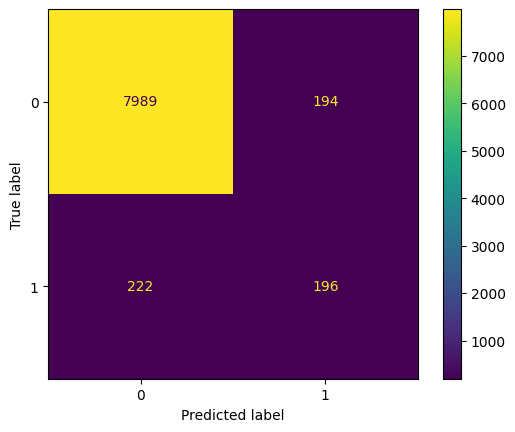

In [47]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [48]:
# Print classification report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8183
           1       0.50      0.47      0.49       418

    accuracy                           0.95      8601
   macro avg       0.74      0.72      0.73      8601
weighted avg       0.95      0.95      0.95      8601



### Random Forest Classifier

In [49]:
clf = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestClassifier(random_state = 42)
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


In [50]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs = -1,scoring='recall')
print(cv_acc_scores)

[1. 1. 1. 1. 1.]


In [51]:
params = {
    "simpleimputer__strategy" : ["mean", "median"],
    "randomforestclassifier__n_estimators" : range(25,100,25),
    "randomforestclassifier__max_depth" : range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [52]:
model2 = GridSearchCV(
    clf,
    param_grid = params,
    cv=5,
    n_jobs=-1,
    verbose = 1
)
model2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [53]:
# Train model
model2.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [54]:
# Get best parameters and best estimator
best_params = model2.best_params_
best_estimator = model2.best_estimator_

best_params

{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

In [55]:
# Evaluate best estimator on test set
y_pred = best_estimator.predict(X_test)
print("Best model recall score:", cross_val_score(best_estimator, X, y, cv=5, scoring='recall').mean())

Best model recall score: 0.3447115384615385


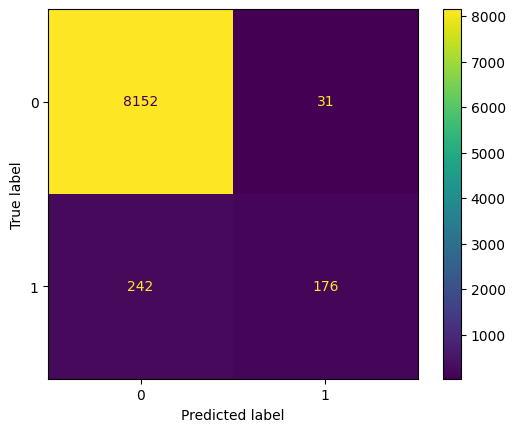

In [56]:
ConfusionMatrixDisplay.from_estimator(model2,X_test,y_test)

In [57]:
# Print classification report
print(classification_report(y_test, model2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8183
           1       0.85      0.42      0.56       418

    accuracy                           0.97      8601
   macro avg       0.91      0.71      0.77      8601
weighted avg       0.97      0.97      0.96      8601



### Gradient Boosting Classifier

In [58]:
clf = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    GradientBoostingClassifier()
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])


In [59]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs = -1,scoring='recall')
print(cv_acc_scores)

[0.86499695 0.8535207  0.85184054 0.85094685 0.85507025]


In [60]:
params = {
    "simpleimputer__strategy" : ["mean", "median"],
    "gradientboostingclassifier__max_depth" : range(2,5),
    "gradientboostingclassifier__n_estimators" : range(20,31,5)
         }
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__max_depth': range(2, 5),
 'gradientboostingclassifier__n_estimators': range(20, 31, 5)}

In [61]:
model3 = GridSearchCV(
    clf,
    param_grid = params,
    cv = 5,
    n_jobs=-1,
    verbose = 1
)
model3

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [62]:
# Train model
model3.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [63]:
# Get best parameters and best estimator
best_params = model3.best_params_
best_estimator = model3.best_estimator_

best_params

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

In [64]:
# Evaluate best estimator on test set
y_pred = best_estimator.predict(X_test)
print("Best model recall score:", cross_val_score(best_estimator, X, y, cv=5, scoring='recall').mean())

Best model recall score: 0.3850396605792289


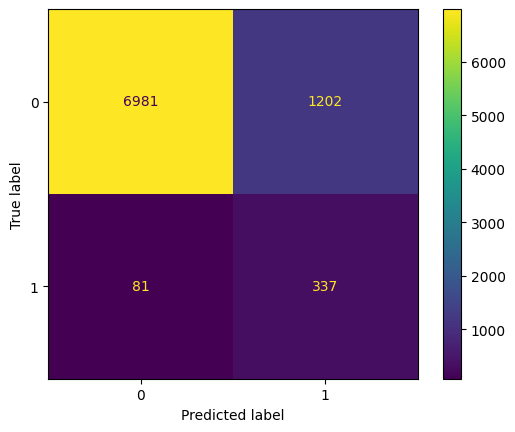

In [65]:
ConfusionMatrixDisplay.from_estimator(model3,X_test,y_test)

In [66]:
# Print classification report
print(classification_report(y_test, model3.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      8183
           1       0.22      0.81      0.34       418

    accuracy                           0.85      8601
   macro avg       0.60      0.83      0.63      8601
weighted avg       0.95      0.85      0.89      8601



### Comparative Study

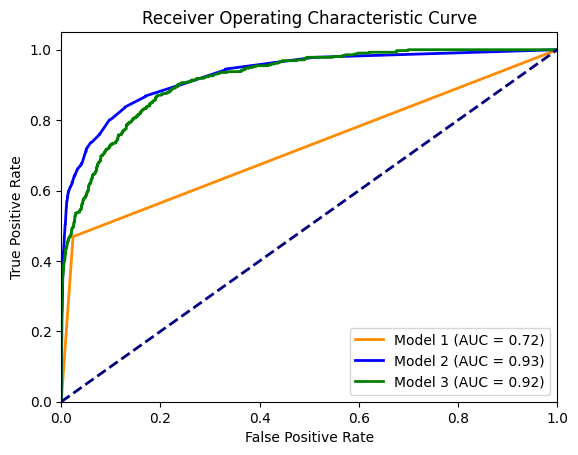

In [68]:
from sklearn.metrics import roc_curve, auc

# Assuming you have defined your models as clf1, clf2, clf3

# Calculate the predicted probabilities for each model
y_pred_prob1 = model.best_estimator_.predict_proba(X_test)[:,1]
y_pred_prob2 = model2.best_estimator_.predict_proba(X_test)[:,1]
y_pred_prob3 = model3.best_estimator_.predict_proba(X_test)[:,1]

# Compute the ROC curve and AUC for each model
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)
roc_auc3 = auc(fpr3, tpr3)

# Plot the ROC curves for each model
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr1, tpr1, color='darkorange',
         lw=lw, label='Model 1 (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue',
         lw=lw, label='Model 2 (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green',
         lw=lw, label='Model 3 (AUC = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


In [69]:
from sklearn.metrics import recall_score

# get the best estimator for each model
best_rf = model2.best_estimator_
best_dt = model.best_estimator_
best_lr = model3.best_estimator_

# evaluate the models on the test set and compute recall scores
rf_recall = recall_score(y_test, best_rf.predict(X_test))
dt_recall = recall_score(y_test, best_dt.predict(X_test))
lr_recall = recall_score(y_test, best_lr.predict(X_test))

# print the recall scores for each model
print("Random Forest Recall:", rf_recall)
print("Decision Tree Recall:", dt_recall)
print("Gradient Boosting Recall:", lr_recall)

# choose the model with the highest recall
if rf_recall > dt_recall and rf_recall > lr_recall:
    print("Random Forest has the highest recall!")
elif dt_recall > rf_recall and dt_recall > lr_recall:
    print("Decision Tree has the highest recall!")
else:
    print("Gradient Boosting has the highest recall!")


Random Forest Recall: 0.42105263157894735
Decision Tree Recall: 0.4688995215311005
Gradient Boosting Recall: 0.80622009569378
Gradient Boosting has the highest recall!
